# Libraries

In [462]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [463]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import r2_score,precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,plot_confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier,LogisticRegression,Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_predict,KFold,GridSearchCV
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import urllib
from matplotlib import rcParams
import seaborn as sns
import math
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Reading and visulal representation and data Cleaning

In [517]:
cardio_vascular_data = pd.read_csv("cardio_new.csv")
cardio_vascular_data.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


id (Unique id for each patient).

age (Age of the patient in years).

origin (place of study).

sex (Male/Female).

cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic]).

trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital)).

chol (serum cholesterol in mg/dl).

fbs (if fasting blood sugar > 120 mg/dl).

restecg (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy].

thalach: maximum heart rate achieved.

exang: exercise-induced angina (True/ False).

oldpeak: ST depression induced by exercise relative to rest.

slope: the slope of the peak exercise ST segment.

ca: number of major vessels (0-3) colored by fluoroscopy.

thal: [normal; fixed defect; reversible defect].

target: the predicted attribute.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


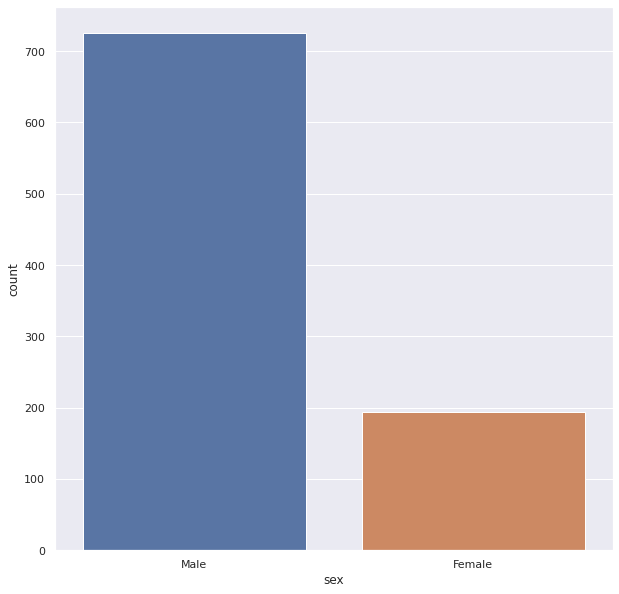

In [518]:
sns.countplot(cardio_vascular_data["sex"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


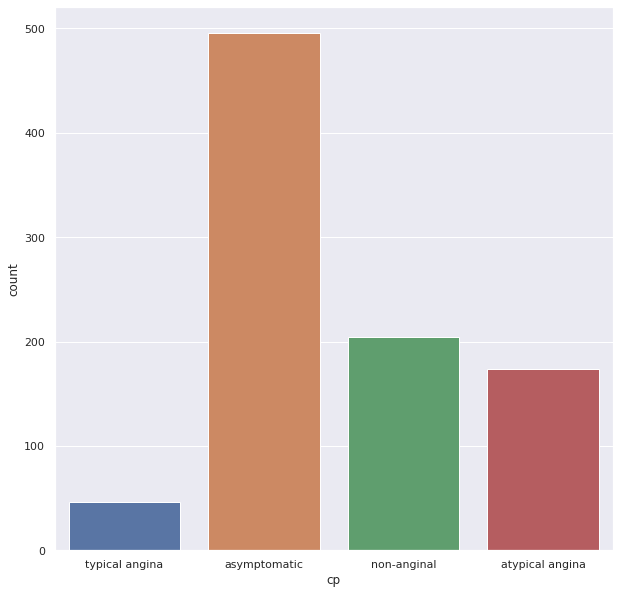

In [519]:
sns.countplot(cardio_vascular_data["cp"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


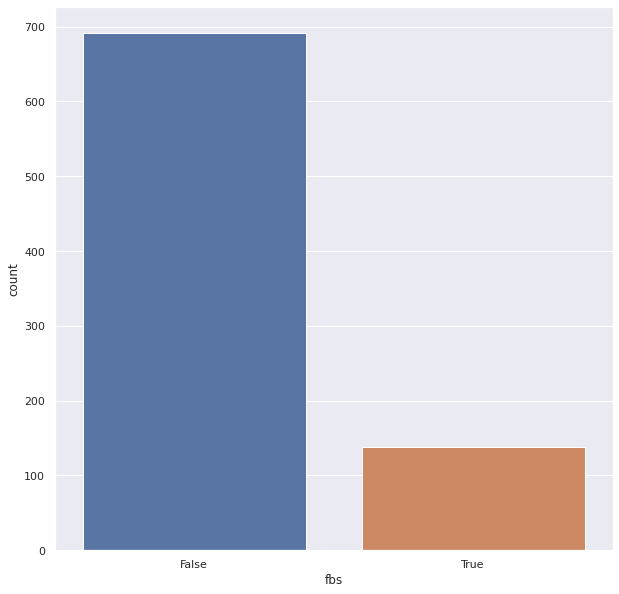

In [520]:
sns.countplot(cardio_vascular_data['fbs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


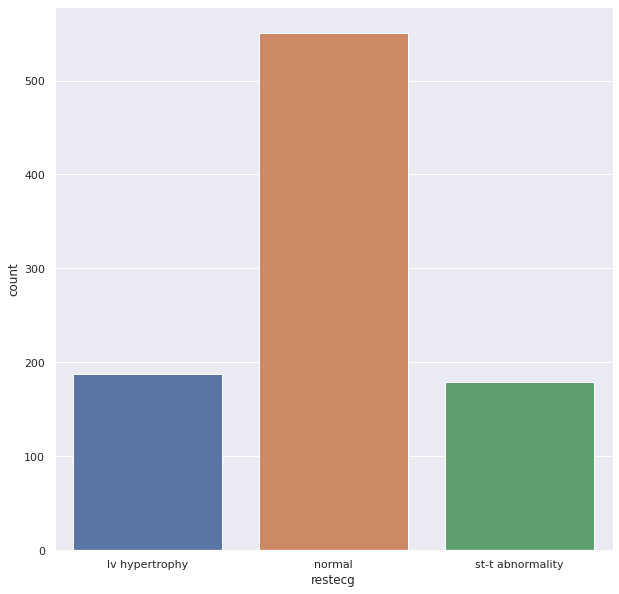

In [521]:
sns.countplot(cardio_vascular_data['restecg'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


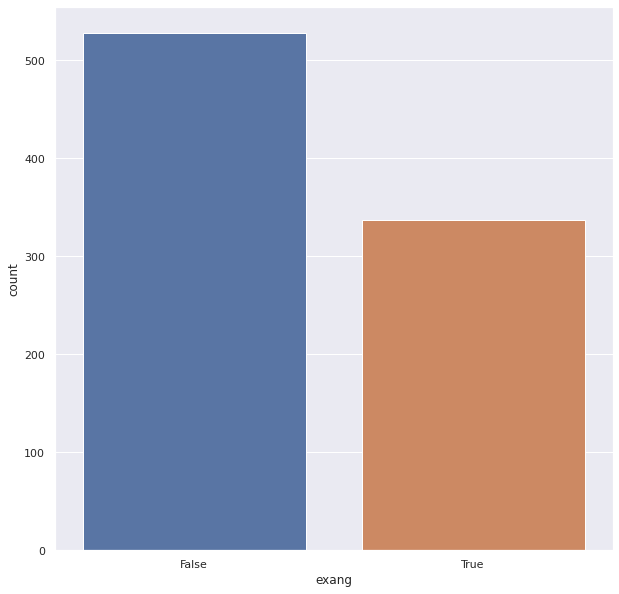

In [522]:
sns.countplot(cardio_vascular_data['exang'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


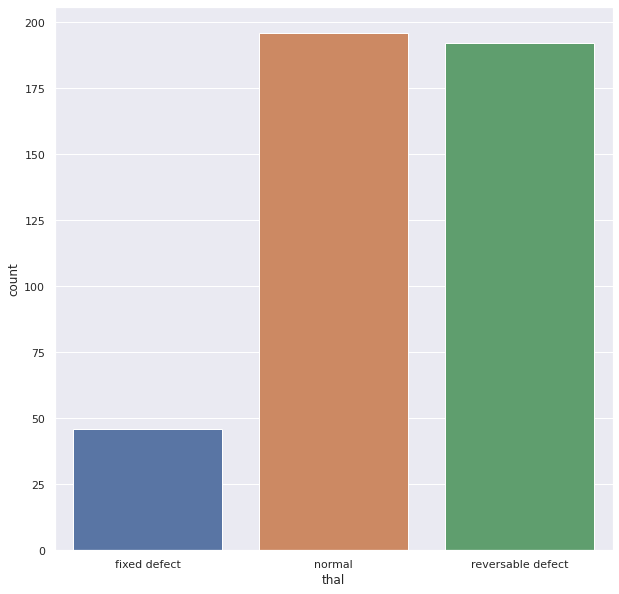

In [523]:
sns.countplot(cardio_vascular_data['thal'])

In [524]:
#Checking the datatypes for all the attributes in the dataset
cardio_vascular_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [525]:
cardio_vascular_data.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

# handling missing values

In [526]:
cardio_vascular_data.dropna(inplace = True)
from sklearn.utils import shuffle
cardio_vascular_data = shuffle(cardio_vascular_data)
cardio_vascular_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 197 to 100
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        299 non-null    int64  
 1   age       299 non-null    int64  
 2   sex       299 non-null    object 
 3   dataset   299 non-null    object 
 4   cp        299 non-null    object 
 5   trestbps  299 non-null    float64
 6   chol      299 non-null    float64
 7   fbs       299 non-null    object 
 8   restecg   299 non-null    object 
 9   thalch    299 non-null    float64
 10  exang     299 non-null    object 
 11  oldpeak   299 non-null    float64
 12  slope     299 non-null    object 
 13  ca        299 non-null    float64
 14  thal      299 non-null    object 
 15  num       299 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 39.7+ KB


In [527]:
cardio_vascular_data.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,153.872910,54.521739,131.715719,246.785953,149.327759,1.058528,0.672241,0.946488
std,95.896287,9.030264,17.747751,52.532582,23.121062,1.162769,0.937438,1.230409
min,1.000000,29.000000,94.000000,100.000000,71.000000,0.000000,0.000000,0.000000
25%,75.500000,48.000000,120.000000,211.000000,132.500000,0.000000,0.000000,0.000000
50%,151.000000,56.000000,130.000000,242.000000,152.000000,0.800000,0.000000,0.000000
75%,227.500000,61.000000,140.000000,275.500000,165.500000,1.600000,1.000000,2.000000
max,749.000000,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


# preprocessing data

In [528]:

cardio_vascular_data['thal'].replace({'fixed defect':'fixed_defect' , 'reversable defect': 'reversable_defect' }, inplace =True)
cardio_vascular_data['cp'].replace({'typical angina':'typical_angina', 'atypical angina': 'atypical_angina' }, inplace =True)


data_tmp = cardio_vascular_data[['age','sex','cp', 'trestbps', 'chol', 'fbs',  'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']].copy()
data_tmp['target'] = ((cardio_vascular_data['num'] > 0)*1).copy()
data_tmp['sex'] = (cardio_vascular_data['sex'] == 'Male')*1
data_tmp['fbs'] = (cardio_vascular_data['fbs'])*1
data_tmp['exang'] = (cardio_vascular_data['exang'])*1

data_tmp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar',
              'max_heart_rate_achieved', 'exercise_induced_angina', 
              'st_depression', 'st_slope_type', 'num_major_vessels', 
              'thalassemia_type', 'target']
data_tmp.head(15)


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
197,45,0,asymptomatic,138.0,236.0,0,152.0,1,0.2,flat,0.0,normal,0
160,46,1,atypical_angina,101.0,197.0,1,156.0,0,0.0,upsloping,0.0,reversable_defect,0
99,48,1,asymptomatic,122.0,222.0,0,186.0,0,0.0,upsloping,0.0,normal,0
43,59,1,non-anginal,150.0,212.0,1,157.0,0,1.6,upsloping,0.0,normal,0
23,58,1,non-anginal,132.0,224.0,0,173.0,0,3.2,upsloping,2.0,reversable_defect,1
250,57,1,asymptomatic,110.0,201.0,0,126.0,1,1.5,flat,0.0,fixed_defect,0
117,35,0,asymptomatic,138.0,183.0,0,182.0,0,1.4,upsloping,0.0,normal,0
149,60,0,non-anginal,102.0,318.0,0,160.0,0,0.0,upsloping,1.0,normal,0
152,67,0,non-anginal,115.0,564.0,0,160.0,0,1.6,flat,0.0,reversable_defect,0
75,65,0,non-anginal,160.0,360.0,0,151.0,0,0.8,upsloping,0.0,normal,0


In [529]:
# One Hot encoding 
cardio_vascular_data = pd.get_dummies(data_tmp, drop_first=False)
cardio_vascular_data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'max_heart_rate_achieved', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical_angina', 'chest_pain_type_non-anginal',
       'chest_pain_type_typical_angina', 'fasting_blood_sugar_0',
       'fasting_blood_sugar_1', 'exercise_induced_angina_0',
       'exercise_induced_angina_1', 'st_slope_type_downsloping',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_fixed_defect', 'thalassemia_type_normal',
       'thalassemia_type_reversable_defect'],
      dtype='object')

# correlation

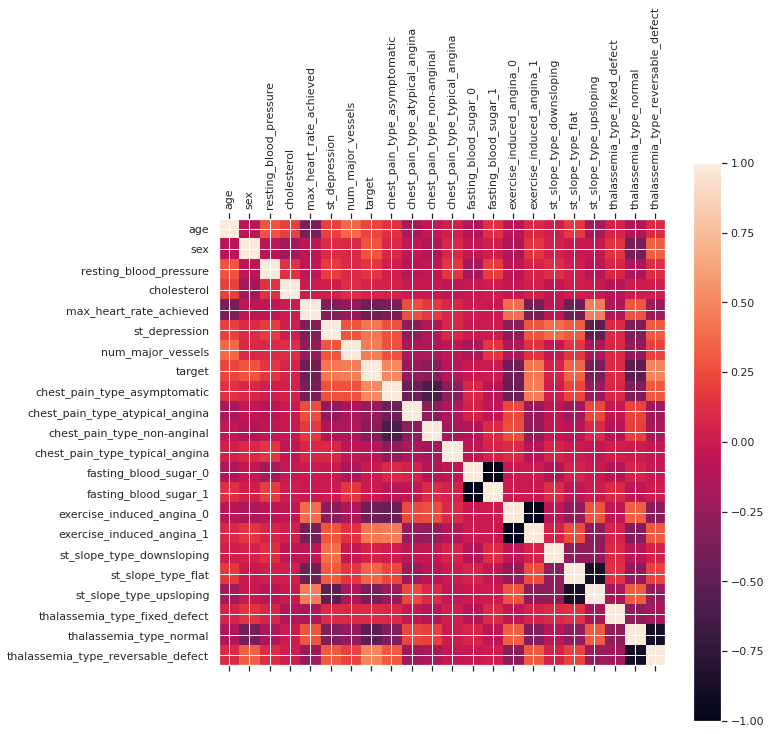

In [530]:
#Correlation matrix for finding out which attributes(features) are correlated.
rcParams['figure.figsize'] = 10,10
plt.matshow(cardio_vascular_data.corr())
plt.yticks(np.arange(cardio_vascular_data.shape[1]), cardio_vascular_data.columns ,rotation='horizontal')
plt.xticks(np.arange(cardio_vascular_data.shape[1]), cardio_vascular_data.columns, rotation='vertical')
plt.colorbar();

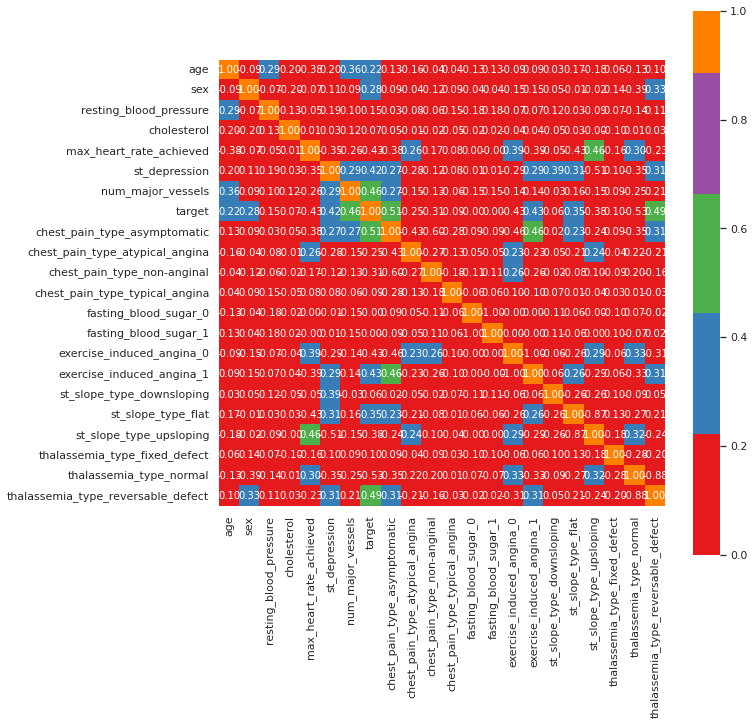

In [531]:
#correlation matrix visualization with values
corrmat = cardio_vascular_data.corr()

plt.figure(figsize=(10,10))
sns.set()
hm = sns.heatmap(corrmat,cmap = 'Set1', cbar=True, annot=True,vmin=0,vmax =1,center=True, square=True, fmt='.2f', annot_kws={'size': 10},
             yticklabels = cardio_vascular_data.columns, xticklabels = cardio_vascular_data.columns)
plt.show()

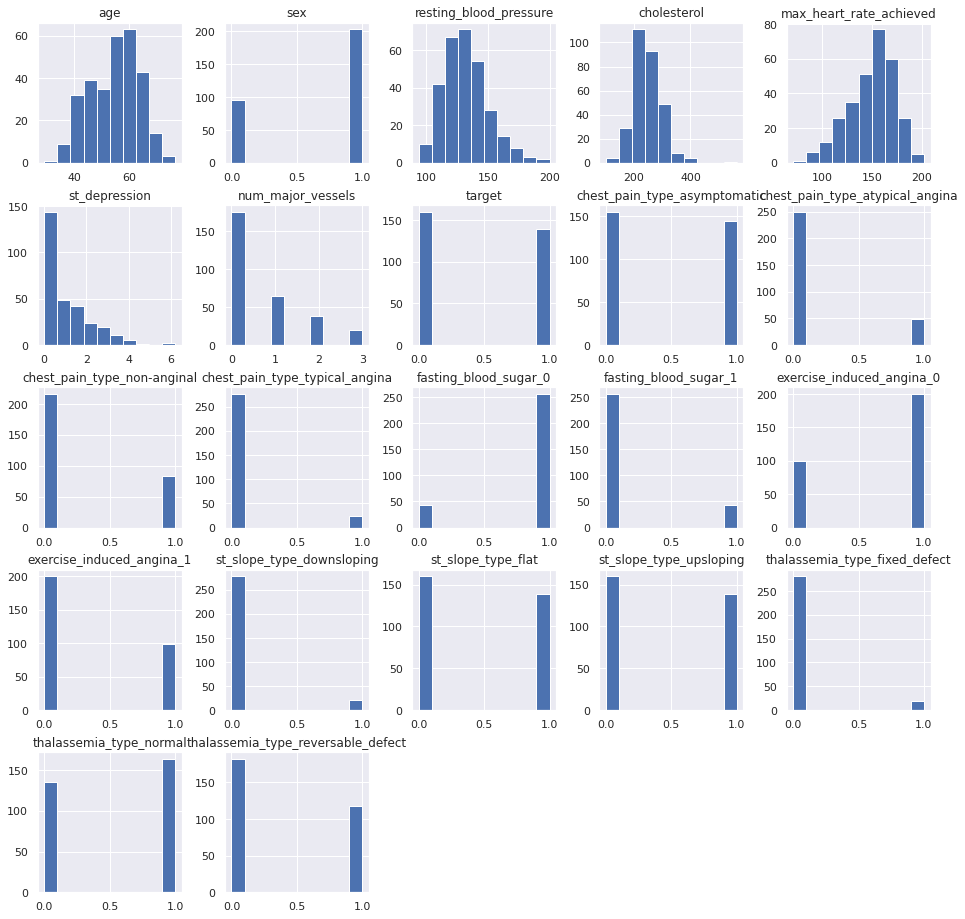

In [532]:
cardio_vascular_data.hist(figsize=(16,16));

In [533]:
cardio_vascular_data.head(2)

,age,sex,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,chest_pain_type_asymptomatic,chest_pain_type_atypical_angina,...,fasting_blood_sugar_0,fasting_blood_sugar_1,exercise_induced_angina_0,exercise_induced_angina_1,st_slope_type_downsloping,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_fixed_defect,thalassemia_type_normal,thalassemia_type_reversable_defect
197,45,0,138.0,236.0,152.0,0.2,0.0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
160,46,1,101.0,197.0,156.0,0.0,0.0,0,0,1,...,0,1,1,0,0,0,1,0,0,1


# Seperating into features and Labels

In [534]:
X = cardio_vascular_data.drop(columns=["target"],axis=1)
y  =cardio_vascular_data["target"]


In [535]:
# creating kFolds for training the model
cv = KFold(n_splits=10,shuffle=True)

# Random Forest Importance

In [536]:
# np.random.seed(33)
# model = RandomForestClassifier(n_estimators=340).fit(X,y)

# best_features = model.feature_importances_
# df = pd.DataFrame(
#     {
#         "features":X.columns,
#         "score":best_features
#     }
# )
# new_df=df.sort_values(by="score",ascending=False)["features"][0:14]
# new_df = list(new_df)
# X=X[new_df]


# chi square test

In [537]:
# np.random.seed(23)
# best_features = SelectKBest(chi2,k=8).fit(X,y)

# selected_features_df = pd.DataFrame(
#     {
#         "features":X.columns,
#         "scores":best_features.scores_
#     }
# )
# new_df = selected_features_df.sort_values(by="scores",ascending=False)['features'][0:16]
# new_df= list(new_df)
# X = X[new_df]


# Feature Selection Algorithm Sequential Feature Selector

In [538]:
# preprocessing and making the pipeline for creating the model.
# model_pipeline = make_pipeline(StandardScaler(),KNeighborsClassifier(n_neighbors=10))
# X.shape[1]

In [539]:
# for regressor r2 score is none means return none value.
# feature_model = sfs(
#     model_pipeline,
#     k_features=X.shape[1],
#     forward=True,
#     scoring =None,
#     cv =cv
# )
# feature_model.fit(X,y)
# best_features=feature_model.subsets_
# best_features

In [540]:
# new_features=[]
# max=0
# for x in range(1,X.shape[1]):
#   if(best_features[x]['avg_score']>max):
#     max = best_features[x]['avg_score']
#     new_features = list(best_features[x]['feature_names'])

# X=X[new_features]


# **Feature Selection Using Lasso Regression**

In [541]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=40)
features = X_train.columns


In [542]:
pipeline =Pipeline([
    ('scaler',StandardScaler()),
    ('model',Lasso())
])

In [543]:
search_feature = GridSearchCV(
    pipeline,
    {"model__alpha":np.arange(0.01,3,0.01)},
    verbose=3,
    cv=cv,
    scoring='neg_mean_squared_error',

)

In [544]:
search_feature.fit(X_train,y_train)

Fitting 10 folds for each of 299 candidates, totalling 2990 fits
[CV 1/10] END ...............model__alpha=0.01;, score=-0.148 total time=   0.0s
[CV 2/10] END ...............model__alpha=0.01;, score=-0.104 total time=   0.0s
[CV 3/10] END ...............model__alpha=0.01;, score=-0.130 total time=   0.0s
[CV 4/10] END ...............model__alpha=0.01;, score=-0.091 total time=   0.0s
[CV 5/10] END ...............model__alpha=0.01;, score=-0.144 total time=   0.0s
[CV 6/10] END ...............model__alpha=0.01;, score=-0.143 total time=   0.0s
[CV 7/10] END ...............model__alpha=0.01;, score=-0.107 total time=   0.0s
[CV 8/10] END ...............model__alpha=0.01;, score=-0.130 total time=   0.0s
[CV 9/10] END ...............model__alpha=0.01;, score=-0.103 total time=   0.0s
[CV 10/10] END ..............model__alpha=0.01;, score=-0.155 total time=   0.0s
[CV 1/10] END ...............model__alpha=0.02;, score=-0.148 total time=   0.0s
[CV 2/10] END ...............model__alpha=0.

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36...
       2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4 , 2.41, 2.42,
       2.43, 2.44, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52, 2.53,
       2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63, 2.64,
       2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74, 2.75,
       2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85, 2.86,
       2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97,
       2.98, 2.99])},
             scoring='neg_mean_squared_error', verbose

In [545]:
search_feature.best_params_

{'model__alpha': 0.01}

In [546]:
best_features =search_feature.best_estimator_[1].coef_

In [547]:
useful_features=np.array(features)[best_features!=0]
X_train=X_train[useful_features]
X_test=X_test[useful_features]

# Spliting the Features

# while using lasso regression feature selection comment the below  block of code

In [548]:
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# normalization (min_max)

In [549]:
X_train=(X_train-np.min(X_train)/(np.max(X_train)-np.min(X_train))).values
X_test =(X_test-np.min(X_test)/np.max(X_test)-np.min(X_test)).values

# **Random Forest Classifier**

In [550]:
np.random.seed(23)
lst_acc_train_rfc = []
lst_y_pred_train_rfc = []
lst_acc_test_rfc = []
lst_y_pred_test_rfc = []
cnt = 0

no_of_decision_trees = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

for i in no_of_decision_trees:
  random_forest_model = RandomForestClassifier(n_estimators=i, max_depth=8, random_state=0)
  random_forest_model.fit(X_train, y_train)
  lst_y_pred_train_rfc.append(random_forest_model.predict(X_train))
  lst_y_pred_test_rfc.append(random_forest_model.predict(X_test))

  lst_acc_train_rfc.append(accuracy_score(y_train, lst_y_pred_train_rfc[cnt]))
  lst_acc_test_rfc.append(accuracy_score(y_test, lst_y_pred_test_rfc[cnt]))

  cnt += 1


In [551]:
#Printing Training and Testing Accuracies for different number of decision trees.

for i in range(0,20):
  print("\nTraining and Testing Accuracy for ", no_of_decision_trees[i]," Decision Trees: ")
  print("Training Accuracy: ", lst_acc_train_rfc[i])
  print("Testing Accuracy: ", lst_acc_test_rfc[i])


Training and Testing Accuracy for  10  Decision Trees: 
Training Accuracy:  0.9874476987447699
Testing Accuracy:  0.7

Training and Testing Accuracy for  20  Decision Trees: 
Training Accuracy:  0.9874476987447699
Testing Accuracy:  0.7666666666666667

Training and Testing Accuracy for  30  Decision Trees: 
Training Accuracy:  0.9916317991631799
Testing Accuracy:  0.7833333333333333

Training and Testing Accuracy for  40  Decision Trees: 
Training Accuracy:  1.0
Testing Accuracy:  0.8

Training and Testing Accuracy for  50  Decision Trees: 
Training Accuracy:  1.0
Testing Accuracy:  0.8

Training and Testing Accuracy for  60  Decision Trees: 
Training Accuracy:  1.0
Testing Accuracy:  0.7833333333333333

Training and Testing Accuracy for  70  Decision Trees: 
Training Accuracy:  1.0
Testing Accuracy:  0.75

Training and Testing Accuracy for  80  Decision Trees: 
Training Accuracy:  1.0
Testing Accuracy:  0.7833333333333333

Training and Testing Accuracy for  90  Decision Trees: 
Train

[0.7,
 0.7666666666666667,
 0.7833333333333333,
 0.8,
 0.8,
 0.7833333333333333,
 0.75,
 0.7833333333333333,
 0.7833333333333333,
 0.8,
 0.7833333333333333,
 0.7833333333333333,
 0.7833333333333333,
 0.7666666666666667,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8]

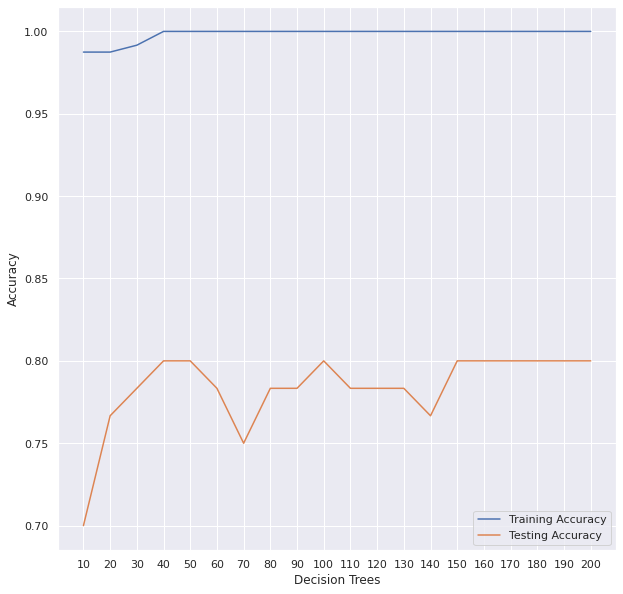

In [552]:
labels = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],labels)
plt.xlabel("Decision Trees")
plt.ylabel("Accuracy")
plt.plot(lst_acc_train_rfc,label='Training Accuracy')
plt.plot(lst_acc_test_rfc,label='Testing Accuracy')
plt.legend()

lst_acc_test_rfc

In [553]:
#Printing Testing and Training Accuracy and Confusion Matrix for the best number of decision trees.
#i.e. For the number of decision trees that has highest testing accuracy in Random Forest Classifier.

max_test_accuracy = np.max(lst_acc_test_rfc)
index = lst_acc_test_rfc.index(max_test_accuracy)

cf_train_rfc = confusion_matrix(y_train,lst_y_pred_train_rfc[index])
cf_test_rfc = confusion_matrix(y_test, lst_y_pred_test_rfc[index])

precision_test_rfc = precision_score(y_test,lst_y_pred_test_rfc[index])

recall_test_rfc = recall_score(y_test,lst_y_pred_test_rfc[index])

f_measure_test_rfc = f1_score(y_test,lst_y_pred_test_rfc[index])

print("\nMaximum Testing Accuracy found for ", no_of_decision_trees[index], "Decision Trees.")

print("\nConfusion Matrix for the Training Dataset")
print(cf_train_rfc)
print("\n\nConfusion Matrix for the Testing Dataset")
print(cf_test_rfc)

acc_train_rfc = lst_acc_train_rfc[index]
print("\nTraining Accuracy : ", acc_train_rfc)
acc_test_rfc = lst_acc_test_rfc[index]
print("Testing Accuracy : ", acc_test_rfc)

print("\nPrecision for random forest testing: ",precision_test_rfc)
print("\nRecall for random forest testing: ",recall_test_rfc)
print("\nF-1 Score for random forest testing",f_measure_test_rfc)


Maximum Testing Accuracy found for  40 Decision Trees.

Confusion Matrix for the Training Dataset
[[127   0]
 [  0 112]]


Confusion Matrix for the Testing Dataset
[[29  4]
 [ 8 19]]

Training Accuracy :  1.0
Testing Accuracy :  0.8

Precision for random forest testing:  0.8260869565217391

Recall for random forest testing:  0.7037037037037037

F-1 Score for random forest testing 0.76


# **Logistic Regression**

In [554]:
np.random.seed(32)

logreg = make_pipeline(StandardScaler(),LogisticRegression(solver="saga", random_state=0))
logreg.fit(X_train, y_train)

y_pred_train_lgr = pd.Series(logreg.predict(X_train))
y_pred_test_lgr = pd.Series(logreg.predict(X_test))

cf_train_lgr = confusion_matrix(y_train, y_pred_train_lgr)
cf_test_lgr = confusion_matrix(y_test, y_pred_test_lgr)

precision_test_lgr = precision_score(y_test,y_pred_test_lgr)

recall_test_lgr = recall_score(y_test,y_pred_test_lgr)

f_measure_test_lgr = f1_score(y_test,y_pred_test_lgr)

print("\nConfusion Matrix for the Training Dataset")
print(cf_train_lgr)
print("\nConfusion Matrix for the Testing Dataset")
print(cf_test_lgr)

acc_train_lgr_ = accuracy_score(y_train, y_pred_train_lgr)
print("\nTraining Accuracy: ", acc_train_lgr_)
acc_test_lgr_ = accuracy_score(y_test, y_pred_test_lgr)
print("\nTesting Accuracy: ", acc_test_lgr_)

print("\nPrecision for logestic regression testing: ",precision_test_lgr)
print("\nRecall for logestic regression testing: ",recall_test_lgr)
print("\nF-1 Score for logestic regression testing",f_measure_test_lgr)


Confusion Matrix for the Training Dataset
[[115  12]
 [ 20  92]]

Confusion Matrix for the Testing Dataset
[[31  2]
 [11 16]]

Training Accuracy:  0.8661087866108786

Testing Accuracy:  0.7833333333333333

Precision for logestic regression testing:  0.8888888888888888

Recall for logestic regression testing:  0.5925925925925926

F-1 Score for logestic regression testing 0.711111111111111


# **K Neighbors Classifier**

In [555]:
#Using kNN for classification for different values of k
np.random.seed(23)
k = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
lst_y_pred_train_knn = []
lst_y_pred_test_knn = []
lst_acc_train_knn = []
lst_acc_test_knn = []
cnt = 0

for i in k:
  knn_classifier = KNeighborsClassifier(n_neighbors = i)
  knn_classifier.fit(X_train, y_train)

  lst_y_pred_train_knn.append(knn_classifier.predict(X_train))
  lst_y_pred_test_knn.append(knn_classifier.predict(X_test))

  lst_acc_train_knn.append(accuracy_score(y_train, lst_y_pred_train_knn[cnt]))
  lst_acc_test_knn.append(accuracy_score(y_test, lst_y_pred_test_knn[cnt]))
  
  cnt += 1

In [556]:
#Printing Testing and Training Accuracies for different values of k.

for i in k:
  print("\nTraining and Testing Accuracy for k =", i)
  print("Training Accuracy: ", lst_acc_train_knn[i-2])
  print("Testing Accuracy: ", lst_acc_test_knn[i-2])


Training and Testing Accuracy for k = 2
Training Accuracy:  0.7949790794979079
Testing Accuracy:  0.4666666666666667

Training and Testing Accuracy for k = 3
Training Accuracy:  0.8075313807531381
Testing Accuracy:  0.4166666666666667

Training and Testing Accuracy for k = 4
Training Accuracy:  0.7447698744769874
Testing Accuracy:  0.4166666666666667

Training and Testing Accuracy for k = 5
Training Accuracy:  0.7489539748953975
Testing Accuracy:  0.4166666666666667

Training and Testing Accuracy for k = 6
Training Accuracy:  0.7364016736401674
Testing Accuracy:  0.5833333333333334

Training and Testing Accuracy for k = 7
Training Accuracy:  0.7196652719665272
Testing Accuracy:  0.65

Training and Testing Accuracy for k = 8
Training Accuracy:  0.6778242677824268
Testing Accuracy:  0.6666666666666666

Training and Testing Accuracy for k = 9
Training Accuracy:  0.7112970711297071
Testing Accuracy:  0.6

Training and Testing Accuracy for k = 10
Training Accuracy:  0.6820083682008368
Test

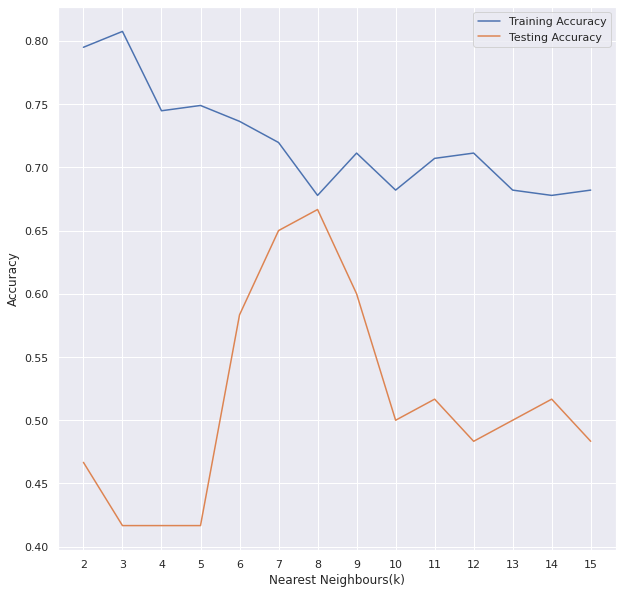

In [557]:
#Plotting Testing and Training Accuracies for different values of k.

labels = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],labels)
plt.xlabel("Nearest Neighbours(k)")
plt.ylabel("Accuracy")
plt.plot(lst_acc_train_knn,label='Training Accuracy')
plt.plot(lst_acc_test_knn,label='Testing Accuracy')
plt.legend()

In [558]:
#Printing Testing and Training Accuracy and Confusion Matrix for the best value of k.
#i.e. For the value of k that has highest testing accuracy in kNN.

max_test_accuracy = np.max(lst_acc_test_knn)
index = lst_acc_test_knn.index(max_test_accuracy)

cf_train_knn = confusion_matrix(y_train, lst_y_pred_train_knn[index])
cf_test_knn = confusion_matrix(y_test, lst_y_pred_test_knn[index])

precision_test_knn = precision_score(y_test,lst_y_pred_test_knn[index])

recall_test_knn = recall_score(y_test,lst_y_pred_test_knn[index])

f_measure_test_knn = f1_score(y_test,lst_y_pred_test_knn[index])

print("Maximum Testing Accuracy found for value of k =", k[index])

print("\nConfusion Matrix for the Training Dataset")
print(cf_train_knn)
print("\nConfusion Matrix for the Testing Dataset")
print(cf_test_knn)

acc_train_knn = lst_acc_train_knn[index]
print("\nTraining Accuracy: ", acc_train_knn)
acc_test_knn = lst_acc_test_knn[index]
print("Testing Accuracy: ", acc_test_knn)

print("\nPrecision for knn testing: ",precision_test_knn)
print("\nRecall for knn testing: ",recall_test_knn)
print("\nF-1 Score for knn testing",f_measure_test_knn)

Maximum Testing Accuracy found for value of k = 8

Confusion Matrix for the Training Dataset
[[104  23]
 [ 54  58]]

Confusion Matrix for the Testing Dataset
[[30  3]
 [17 10]]

Training Accuracy:  0.6778242677824268
Testing Accuracy:  0.6666666666666666

Precision for knn testing:  0.7692307692307693

Recall for knn testing:  0.37037037037037035

F-1 Score for knn testing 0.5


# **SVM**

In [559]:
np.random.seed(23)

support_vector_classifier = svm.LinearSVC(dual=False, random_state=0) 
support_vector_classifier.fit(X_train,y_train)

y_pred_train_svc = support_vector_classifier.predict(X_train) 
y_pred_test_svc = support_vector_classifier.predict(X_test)

cf_train_svc = confusion_matrix(y_train, y_pred_train_svc)
cf_test_svc = confusion_matrix(y_test, y_pred_test_svc)

precision_test_svc = precision_score(y_test,y_pred_test_svc)

recall_test_svc = recall_score(y_test,y_pred_test_svc)

f_measure_test_svc = f1_score(y_test,y_pred_test_svc)

print("\nConfusion Matrix for the Training Dataset") 
print(cf_train_svc) 
print("\nConfusion Matrix for the Testing Dataset") 
print(cf_test_svc)

acc_train_svc = accuracy_score(y_train, y_pred_train_svc) 
print("\nTraining Accuracy: ", acc_train_svc) 
acc_test_svc = accuracy_score(y_test, y_pred_test_svc) 
print("\nTesting Accuracy: ", acc_test_svc)

print("\nPrecision for svc testing: ",precision_test_svc)
print("\nRecall for svc testing: ",recall_test_svc)
print("\nF-1 Score for svc testing",f_measure_test_svc)


Confusion Matrix for the Training Dataset
[[118   9]
 [ 22  90]]

Confusion Matrix for the Testing Dataset
[[30  3]
 [ 9 18]]

Training Accuracy:  0.8702928870292888

Testing Accuracy:  0.8

Precision for svc testing:  0.8571428571428571

Recall for svc testing:  0.6666666666666666

F-1 Score for svc testing 0.75


# **XG BOOST Classifier**

In [560]:
np.random.seed(32)

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
xgb_classifier.fit(X_train,y_train)

y_pred_train_xgb = xgb_classifier.predict(X_train) 
y_pred_test_xgb = xgb_classifier.predict(X_test)

cf_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)
cf_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

precision_test_xgb = precision_score(y_test,y_pred_test_xgb)

recall_test_xgb = recall_score(y_test,y_pred_test_xgb)

f_measure_test_xgb = f1_score(y_test,y_pred_test_xgb)

print("\nConfusion Matrix for the Training Dataset") 
print(cf_train_xgb) 
print("\nConfusion Matrix for the Testing Dataset") 
print(cf_test_xgb)

acc_train_xgb = accuracy_score(y_train, y_pred_train_xgb) 
print("\nTraining Accuracy: ", acc_train_xgb) 
acc_test_xgb = accuracy_score(y_test, y_pred_test_xgb) 
print("\nTesting Accuracy: ", acc_test_xgb)

print("\nPrecision for xgb testing: ",precision_test_xgb)
print("\nRecall for xgb testing: ",recall_test_xgb)
print("\nF-1 Score for xgb testing",f_measure_test_xgb)


Confusion Matrix for the Training Dataset
[[125   2]
 [  5 107]]

Confusion Matrix for the Testing Dataset
[[30  3]
 [10 17]]

Training Accuracy:  0.9707112970711297

Testing Accuracy:  0.7833333333333333

Precision for xgb testing:  0.85

Recall for xgb testing:  0.6296296296296297

F-1 Score for xgb testing 0.723404255319149


# **Decision Tree Classifier**

In [561]:
np.random.seed(23)

decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

y_pred_train_dtc = decision_tree_classifier.predict(X_train)
y_pred_test_dtc = decision_tree_classifier.predict(X_test)

cf_train_dtc = confusion_matrix(y_train, y_pred_train_dtc)
cf_test_dtc = confusion_matrix(y_test, y_pred_test_dtc)

precision_test_dtc = precision_score(y_test,y_pred_test_dtc)

recall_test_dtc = recall_score(y_test,y_pred_test_dtc)

f_measure_test_dtc = f1_score(y_test,y_pred_test_dtc)

print("\nConfusion Matrix for the Training Dataset") 
print(cf_train_dtc) 
print("\nConfusion Matrix for the Testing Dataset") 
print(cf_test_dtc)

acc_train_dtc = accuracy_score(y_train, y_pred_train_dtc) 
print("\nTraining Accuracy: ", acc_train_dtc) 
acc_test_dtc = accuracy_score(y_test, y_pred_test_dtc) 
print("\nTesting Accuracy: ", acc_test_dtc)

print("\nPrecision for decision tree testing: ",precision_test_dtc)
print("\nRecall for decision tree testing: ",recall_test_dtc)
print("\nF-1 Score for decision tree testing",f_measure_test_dtc)


Confusion Matrix for the Training Dataset
[[127   0]
 [  0 112]]

Confusion Matrix for the Testing Dataset
[[25  8]
 [20  7]]

Training Accuracy:  1.0

Testing Accuracy:  0.5333333333333333

Precision for decision tree testing:  0.4666666666666667

Recall for decision tree testing:  0.25925925925925924

F-1 Score for decision tree testing 0.33333333333333337


# **BernoulliNB Classifier**

In [562]:
# creating the model 
np.random.seed(0)
bmodel = BernoulliNB(binarize=True)
bmodel.fit(X_train,y_train)
print(bmodel)
bmodel_train_pred = bmodel.predict(X_train)
bmodel_test_pred = bmodel.predict(X_test)
bmodel_train_cmatrix = confusion_matrix(y_train,bmodel_train_pred)
bmodel_test_cmatrix = confusion_matrix(y_test,bmodel_test_pred)

bmodel_precision_test = precision_score(y_test,bmodel_test_pred)
bmodel_recall_test = recall_score(y_test,bmodel_test_pred)
bmodel_f1_score =f1_score(y_test,bmodel_test_pred)
print("confusion matrix of the Training dataset.\n")
print(bmodel_train_cmatrix)
print("confusion matrix of the Test dataset\n")
print(bmodel_test_cmatrix)
bmodel_train_accuracy_score = accuracy_score(y_train,bmodel_train_pred)
print("accuracy score of training dataset\n",bmodel_train_accuracy_score)
bmodel_test_accuracy_score = accuracy_score(y_test,bmodel_test_pred)
print("accuracy score of test dataset\n",bmodel_test_accuracy_score)

print("precision of the bernoulliNB classifier",bmodel_precision_test)
print("recall of the bernoulliNB classifier",bmodel_recall_test)
print("f1 score of the bernoulliNB classifieer",bmodel_f1_score)

BernoulliNB(binarize=True)
confusion matrix of the Training dataset.

[[90 37]
 [29 83]]
confusion matrix of the Test dataset

[[22 11]
 [10 17]]
accuracy score of training dataset
 0.7238493723849372
accuracy score of test dataset
 0.65
precision of the bernoulliNB classifier 0.6071428571428571
recall of the bernoulliNB classifier 0.6296296296296297
f1 score of the bernoulliNB classifieer 0.6181818181818182


# StochasticClassifier Boosting

In [563]:
np.random.seed(32)

sgd_model =SGDClassifier(random_state=42)


sgd_model.fit(X_train,y_train)
sgd_model_train_pred = sgd_model.predict(X_train)
sgd_model_test_pred = sgd_model.predict(X_test)

train_cmatrix = confusion_matrix(y_train,sgd_model_train_pred)
test_cmatrix = confusion_matrix(y_test,sgd_model_test_pred)

print("confusion matrix of train dataset:\n",train_cmatrix)
print("confusion matrix of test dataset:\n",test_cmatrix)

sgd_model_precision_score = precision_score(y_test,sgd_model_test_pred)
sgd_model_recall_score = recall_score(y_test,sgd_model_test_pred)
sgd_model_f1_score = f1_score(y_test,sgd_model_test_pred)

sgd_model_train_accuracy = accuracy_score(y_train,sgd_model_train_pred)
sgd_model_test_accuracy = accuracy_score(y_test,sgd_model_test_pred)

print("accuracy score of train dataset:",sgd_model_train_accuracy)
print("accuracy score of test dataset:",sgd_model_test_accuracy)

print("precision of the Gradient Boosting classifier:",sgd_model_precision_score)
print("recall of the Gradient Boosting classifier:",sgd_model_recall_score)
print("f1 score of the Gradient Boosting classifier:",sgd_model_f1_score)


confusion matrix of train dataset:
 [[110  17]
 [ 56  56]]
confusion matrix of test dataset:
 [[27  6]
 [14 13]]
accuracy score of train dataset: 0.694560669456067
accuracy score of test dataset: 0.6666666666666666
precision of the Gradient Boosting classifier: 0.6842105263157895
recall of the Gradient Boosting classifier: 0.48148148148148145
f1 score of the Gradient Boosting classifier: 0.5652173913043478


# Gradient Boosting Classifier

In [564]:
np.random.seed(33)

gradient_model = GradientBoostingClassifier(max_depth=3,
                                            n_estimators=5000,
                                            learning_rate=0.05,
                                            subsample=0.5,
                                            validation_fraction=0.1,
                                            max_features='log2',
                                            n_iter_no_change=20)

gradient_model.fit(X_train,y_train)
gradient_model_train_pred = gradient_model.predict(X_train)
gradient_model_test_pred = gradient_model.predict(X_test)

train_cmatrix = confusion_matrix(y_train,gradient_model_train_pred)
test_cmatrix = confusion_matrix(y_test,gradient_model_test_pred)

print("confusion matrix of train dataset:\n",train_cmatrix)
print("confusion matrix of test dataset:\n",test_cmatrix)

gradient_model_precision_score = precision_score(y_test,gradient_model_test_pred)
gradient_model_recall_score = recall_score(y_test,gradient_model_test_pred)
gradient_model_f1_score = f1_score(y_test,gradient_model_test_pred)

gradient_model_train_accuracy = accuracy_score(y_train,gradient_model_train_pred)
gradient_model_test_accuracy = accuracy_score(y_test,gradient_model_test_pred)

print("accuracy score of train dataset:",gradient_model_train_accuracy)
print("accuracy score of test dataset:",gradient_model_test_accuracy)

print("precision of the Gradient Boosting classifier:",gradient_model_precision_score)
print("recall of the Gradient Boosting classifier:",gradient_model_recall_score)
print("f1 score of the Gradient Boosting classifier:",gradient_model_f1_score)

confusion matrix of train dataset:
 [[121   6]
 [  6 106]]
confusion matrix of test dataset:
 [[29  4]
 [ 9 18]]
accuracy score of train dataset: 0.9497907949790795
accuracy score of test dataset: 0.7833333333333333
precision of the Gradient Boosting classifier: 0.8181818181818182
recall of the Gradient Boosting classifier: 0.6666666666666666
f1 score of the Gradient Boosting classifier: 0.7346938775510203


# Evaluation

In [565]:
evaluation = {
              'Classifier': ["RandomForestClassifier", "LogisticRegressionClassifier", "KNeighborsClassifier",
                             "SupportVectorClassifier", "XGBClassifier", "DecisionTreeClassifier",
                             "BernoulliNBClassifier","GradientBoostingClassifier",
                             "stochastic gradient boosting"],
              'Training Accuracy': [acc_train_rfc,acc_train_lgr_,acc_train_knn,acc_train_svc,acc_train_xgb,acc_train_dtc,bmodel_train_accuracy_score,
                                    gradient_model_train_accuracy,sgd_model_train_accuracy],
              'Testing Accuracy': [acc_test_rfc,acc_test_lgr_,acc_test_knn,acc_test_svc,acc_test_xgb,acc_test_dtc,
                                   bmodel_test_accuracy_score,gradient_model_test_accuracy,
                                   sgd_model_test_accuracy],
              'Precision': [precision_test_rfc,precision_test_lgr,precision_test_knn,precision_test_svc,precision_test_xgb,
                            precision_test_dtc,bmodel_precision_test,gradient_model_precision_score,
                            sgd_model_precision_score],
              'Recall': [recall_test_rfc,recall_test_lgr,recall_test_knn,recall_test_svc,recall_test_xgb,
                         recall_test_dtc,bmodel_recall_test,gradient_model_recall_score,
                         sgd_model_recall_score],
              'F1-Score': [f_measure_test_rfc,f_measure_test_lgr,f_measure_test_knn,
                           f_measure_test_svc,f_measure_test_xgb,
                           f_measure_test_dtc,bmodel_f1_score,gradient_model_f1_score,sgd_model_f1_score]
              
              }

In [566]:
eval = pd.DataFrame(evaluation,index=[1,2,3,4,5,6,7,8,9],)
eval.to_csv("eval1.csv",index=False)

# Test Results all Classifiers

In [567]:
eval

,Classifier,Training Accuracy,Testing Accuracy,Precision,Recall,F1-Score
1,RandomForestClassifier,1.000000,0.800000,0.826087,0.703704,0.760000
2,LogisticRegressionClassifier,0.866109,0.783333,0.888889,0.592593,0.711111
3,KNeighborsClassifier,0.677824,0.666667,0.769231,0.370370,0.500000
4,SupportVectorClassifier,0.870293,0.800000,0.857143,0.666667,0.750000
5,XGBClassifier,0.970711,0.783333,0.850000,0.629630,0.723404
6,DecisionTreeClassifier,1.000000,0.533333,0.466667,0.259259,0.333333
7,BernoulliNBClassifier,0.723849,0.650000,0.607143,0.629630,0.618182
8,GradientBoostingClassifier,0.949791,0.783333,0.818182,0.666667,0.734694
9,stochastic gradient boosting,0.694561,0.666667,0.684211,0.481481,0.565217


True